In [39]:
import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt

from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import pickle

from tqdm import tqdm

### Предобработка и анализ данных

In [5]:
data = pd.read_csv("./data/scooters_trips_info.csv", index_col=0)
data

,average_speed,peak_speed,average_acceleration,peak_acceleration
0,6.443223,7.388889,-0.011087,0.977465
1,5.237365,7.500000,-0.007952,2.199546
2,4.968280,7.083333,-0.030921,1.382306
3,6.049740,7.500000,-0.029479,1.229105
4,6.428615,7.555556,-0.062866,0.950728
...,...,...,...,...
22498,3.907132,6.750000,0.003167,1.248171
22499,4.830391,7.611111,-0.052442,2.365561
22500,5.389947,7.250000,-0.014757,0.748727
22501,4.175000,6.722222,-0.012502,0.781178


In [7]:
for col in data.columns:
    data = data.loc[np.abs(stats.zscore(data[col])) < 3]

print(f"Count of road trips (after outlires dropping): {len(data)}")

Count of road trips (after outlires dropping): 20674


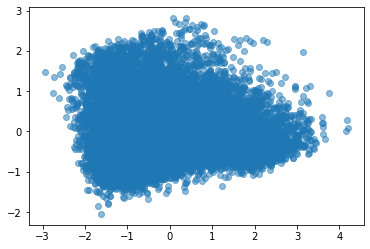

In [12]:
pca = PCA(n_components=2)
# pca = pickle.load(open("pca_model.pkl", "rb"))
pca_data = pca.fit_transform(data)
# pca_data = pca.transform(data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)

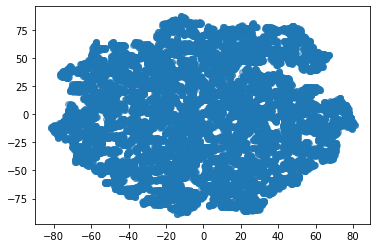

In [13]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(data)
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], alpha=0.5)
plt.show()

In [14]:
def get_distribution(df, column_name):
    min_v = int(df[column_name].min())
    max_v = int(df[column_name].max())
    r = range(min_v, max_v+1, 1)
    hist = df.hist(column_name, bins=r, figsize=(15, 5))
    return hist

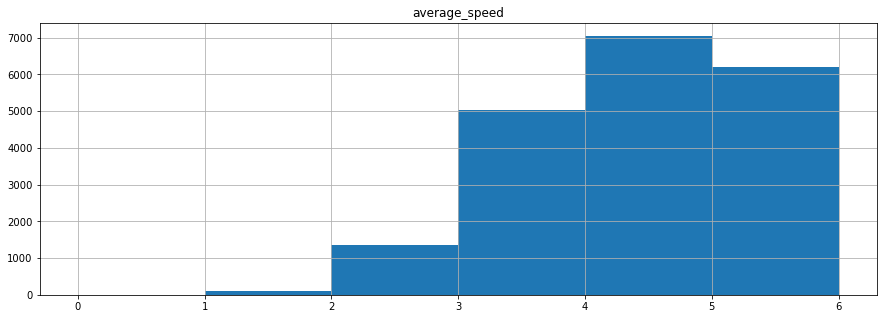

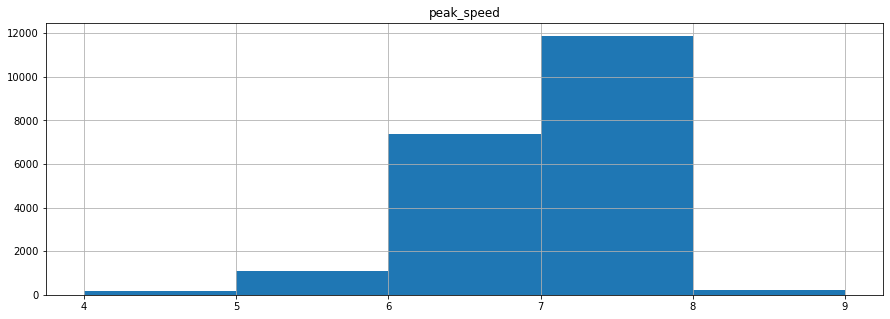

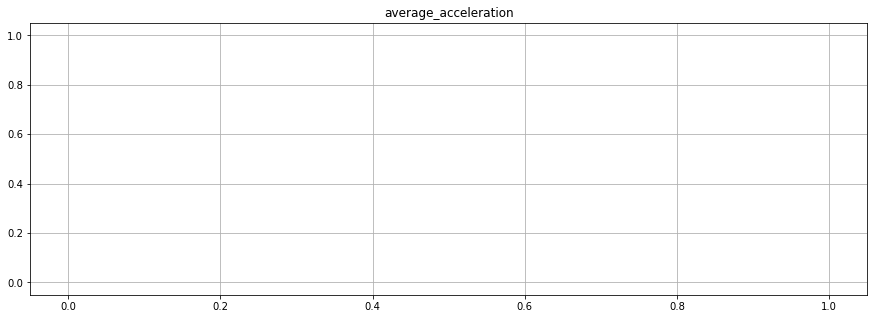

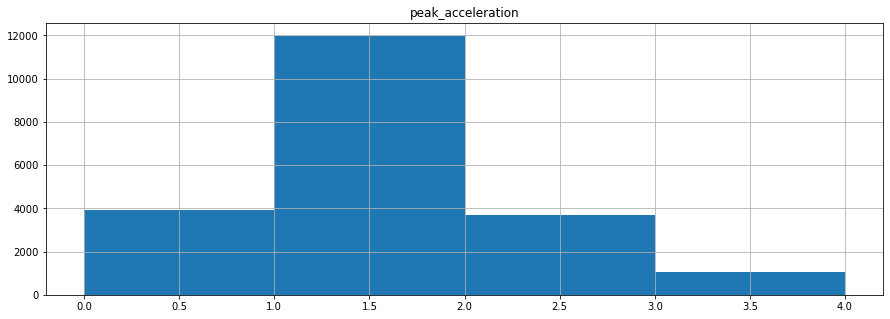

In [15]:
N = len(data.columns)
for i in range(N):
    col = data.columns[i]
    # print(col)
    get_distribution(data, col)

### Сетка параметров кластеризации

In [19]:
scale_models = [MinMaxScaler(), StandardScaler(), RobustScaler()]
cluster_models = [KMeans(), AgglomerativeClustering(), DBSCAN()]

### Эксперименты

In [20]:
def visualisation(tsne_data, c_predicted, n_clusters):
    d = {0: "Корректное поведение", 1:"Опасное поведение", 2:"Потенциально опасное\nповедение"}
    for i in range(n_clusters):
        plt.scatter(tsne_data[c_predicted == i, 0], tsne_data[c_predicted == i, 1], alpha=0.5, label=i) #d[i]
        plt.legend(loc=0)
    plt.show()

In [23]:
def show_kmeans(X, data, tsne_data):
    
    # Метод локтя
    print("Elbow method")
    sse = []
    k_rng = range(1,13)
    for k in k_rng:
        km = KMeans(n_clusters=k, init="random", random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.xlabel("K")
    plt.ylabel("Sum of squared distances")
    plt.plot(k_rng, sse, marker="o")
    plt.show()
    
    # Отображение информации о кластерах
    for i in range(2, 6):
        n_clusters = i
        km = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
        c_predicted = km.fit_predict(X)
        
        # Силуэт
        estimation_score = silhouette_score(X, c_predicted)
        print(f"{n_clusters} clusters silhouette_score: {estimation_score}")
        
        # Средние значения
        data["cluster"] = c_predicted
        for c in range(n_clusters):
            cluster_members = data[data['cluster'] == c]
            print('Cluster {} size: {}'.format(c, len(cluster_members)))
        desc = data.groupby(["cluster"])
        desc = pd.DataFrame(desc.mean())
        display(desc)
        data.drop(["cluster"], axis=1, inplace=True)
        
        # Визуализация
        visualisation(tsne_data, c_predicted, n_clusters)

MinMaxScaler(copy=True, feature_range=(0, 1))
Elbow method


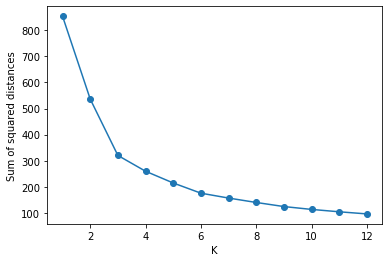

2 clusters silhouette_score: 0.3592894537066538
Cluster 0 size: 12409
Cluster 1 size: 8265


,average_speed,peak_speed,average_acceleration,peak_acceleration
cluster,,,,
0,5.146987,7.236018,-0.024048,1.784517
1,3.522327,6.604288,-0.028142,1.307012


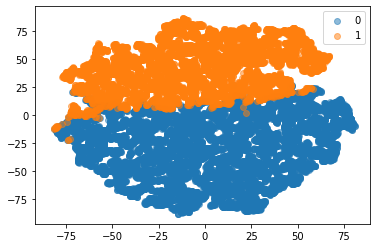

3 clusters silhouette_score: 0.41236504415756453
Cluster 0 size: 7088
Cluster 1 size: 4578
Cluster 2 size: 9008


,average_speed,peak_speed,average_acceleration,peak_acceleration
cluster,,,,
0,3.476009,6.545942,-0.028634,1.170635
1,4.633305,7.246632,-0.023492,2.626438
2,5.232212,7.193991,-0.024478,1.401557


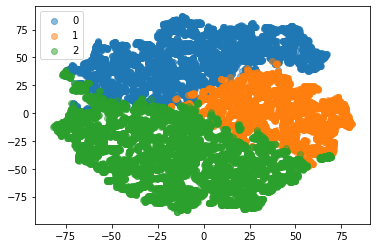

4 clusters silhouette_score: 0.3437508895489101
Cluster 0 size: 3800
Cluster 1 size: 6638
Cluster 2 size: 3945
Cluster 3 size: 6291


,average_speed,peak_speed,average_acceleration,peak_acceleration
cluster,,,,
0,3.082575,6.245826,-0.028249,1.047810
1,5.468098,7.245878,-0.022889,1.417009
2,4.668967,7.259006,-0.023048,2.733805
3,4.220458,6.979358,-0.028739,1.394671


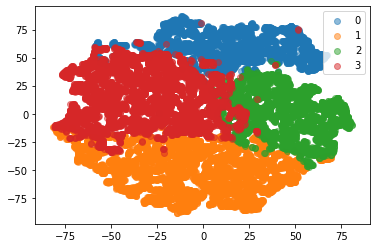

5 clusters silhouette_score: 0.3418100227936737
Cluster 0 size: 2350
Cluster 1 size: 5441
Cluster 2 size: 3462
Cluster 3 size: 3464
Cluster 4 size: 5957


,average_speed,peak_speed,average_acceleration,peak_acceleration
cluster,,,,
0,4.273572,7.175626,-0.023520,2.903177
1,5.451732,7.198906,-0.023198,1.266356
2,3.050018,6.197614,-0.028179,1.010174
3,5.223104,7.353293,-0.022974,2.200562
4,4.133494,6.952539,-0.028936,1.362068


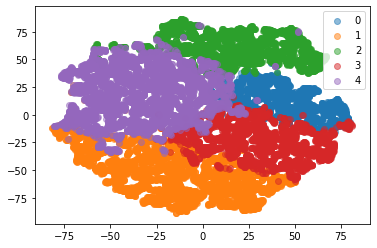

StandardScaler(copy=True, with_mean=True, with_std=True)
Elbow method


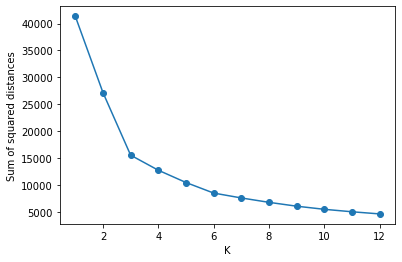

2 clusters silhouette_score: 0.3443853309427114
Cluster 0 size: 8615
Cluster 1 size: 12059


,average_speed,peak_speed,average_acceleration,peak_acceleration
cluster,,,,
0,3.542365,6.632589,-0.028003,1.394739
1,5.179826,7.234136,-0.024028,1.735703


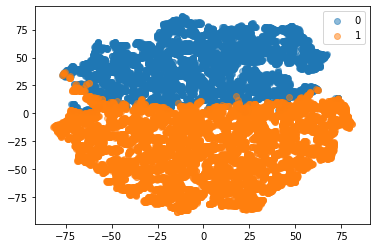

3 clusters silhouette_score: 0.4102053239643761
Cluster 0 size: 9001
Cluster 1 size: 4680
Cluster 2 size: 6993


,average_speed,peak_speed,average_acceleration,peak_acceleration
cluster,,,,
0,5.231484,7.192105,-0.024490,1.396778
1,4.609926,7.239025,-0.023551,2.614993
2,3.477470,6.543889,-0.028650,1.163442


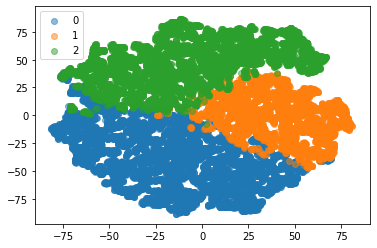

4 clusters silhouette_score: 0.3530404330470237
Cluster 0 size: 2555
Cluster 1 size: 6380
Cluster 2 size: 5385
Cluster 3 size: 6354


,average_speed,peak_speed,average_acceleration,peak_acceleration
cluster,,,,
0,4.439648,7.213818,-0.022834,2.944686
1,3.415357,6.498885,-0.028420,1.123383
2,4.827469,7.236805,-0.025679,1.926103
3,5.327635,7.162702,-0.024088,1.240730


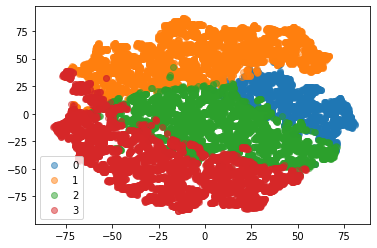

5 clusters silhouette_score: 0.3378462547501379
Cluster 0 size: 2451
Cluster 1 size: 5772
Cluster 2 size: 3437
Cluster 3 size: 3671
Cluster 4 size: 5343


,average_speed,peak_speed,average_acceleration,peak_acceleration
cluster,,,,
0,4.306777,7.182941,-0.023446,2.905069
1,4.121412,6.948930,-0.028996,1.353681
2,3.048038,6.194315,-0.028184,1.008644
3,5.191163,7.340416,-0.023213,2.145564
4,5.447019,7.191663,-0.023224,1.248301


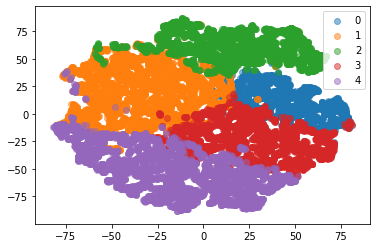

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
Elbow method


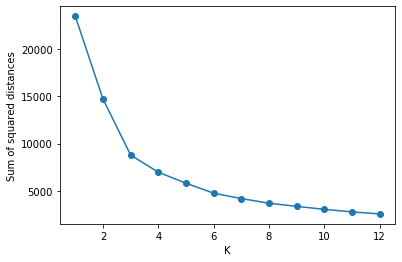

2 clusters silhouette_score: 0.37294732355572496
Cluster 0 size: 14585
Cluster 1 size: 6089


,average_speed,peak_speed,average_acceleration,peak_acceleration
cluster,,,,
0,4.528436,6.905872,-0.026290,1.242931
1,4.423346,7.169331,-0.024234,2.433629


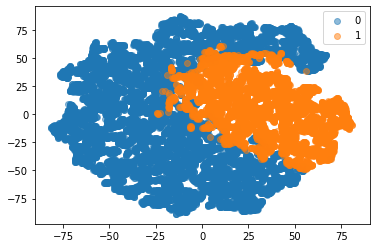

3 clusters silhouette_score: 0.40304302707952266
Cluster 0 size: 6957
Cluster 1 size: 4777
Cluster 2 size: 8940


,average_speed,peak_speed,average_acceleration,peak_acceleration
cluster,,,,
0,3.494413,6.551028,-0.028672,1.159765
1,4.574246,7.226729,-0.023627,2.604375
2,5.237046,7.190001,-0.024459,1.391156


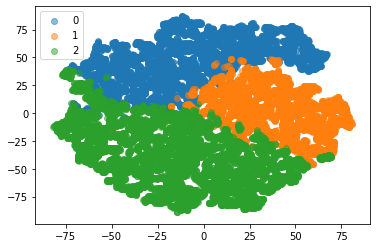

4 clusters silhouette_score: 0.36163014893616896
Cluster 0 size: 2618
Cluster 1 size: 6464
Cluster 2 size: 6192
Cluster 3 size: 5400


,average_speed,peak_speed,average_acceleration,peak_acceleration
cluster,,,,
0,4.390216,7.200004,-0.023080,2.917684
1,5.303430,7.153878,-0.024254,1.233127
2,3.410855,6.490382,-0.028356,1.109000
3,4.830744,7.239902,-0.025596,1.938919


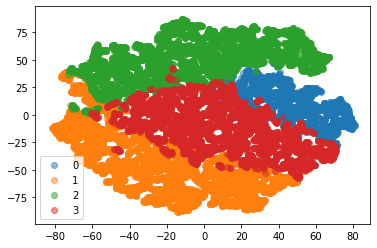

5 clusters silhouette_score: 0.3476738197844808
Cluster 0 size: 2996
Cluster 1 size: 5055
Cluster 2 size: 5657
Cluster 3 size: 4854
Cluster 4 size: 2112


,average_speed,peak_speed,average_acceleration,peak_acceleration
cluster,,,,
0,3.561644,6.892635,-0.027813,1.794269
1,5.007043,7.272173,-0.024920,1.894526
2,5.345151,7.154455,-0.024108,1.202670
3,3.483029,6.411505,-0.028520,0.960467
4,4.666456,7.277857,-0.022200,3.091121


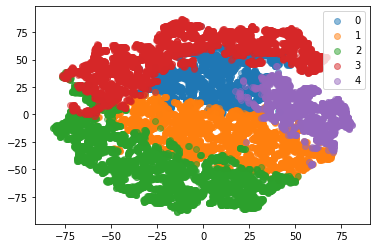

In [24]:
for scaler in scale_models:
    print(scaler)
    # X = data.values.tolist()
    X = pca_data
    X = scaler.fit_transform(X)
    show_kmeans(X, data, tsne_data)
    print("="*127)

Наилучший результат показала модель, использующая для масштабирования данных **MinMaxScaler** и разделяющая их на **3 кластера**  
_Shillluette = 0.412_

In [28]:
def visualisation(tsne_data, c_predicted, n_clusters):
    d = {0: "Корректное поведение", 1:"Опасное поведение", 2:"Потенциально опасное\nповедение"}
    for i in range(n_clusters):
        plt.scatter(tsne_data[c_predicted == i, 0], tsne_data[c_predicted == i, 1], alpha=0.5, label=d[i])
        plt.legend(loc=0)
    plt.show()

3 clusters silhouette_score: 0.41236504415756453
Cluster 0 size: 7088
Cluster 1 size: 4578
Cluster 2 size: 9008


,average_speed,peak_speed,average_acceleration,peak_acceleration
cluster,,,,
0,3.476009,6.545942,-0.028634,1.170635
1,4.633305,7.246632,-0.023492,2.626438
2,5.232212,7.193991,-0.024478,1.401557


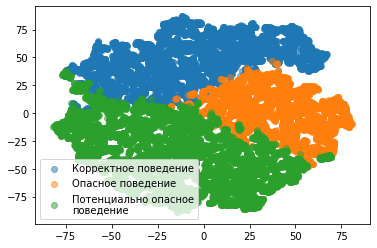

In [29]:
X = pca_data
scaler = scale_models[0].fit(X)
X = scaler.transform(X)

n_clusters = 3
km = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
c_predicted = km.fit_predict(X)
        
# Силуэт
estimation_score = silhouette_score(X, c_predicted)
print(f"{n_clusters} clusters silhouette_score: {estimation_score}")
        
# Средние значения
data["cluster"] = c_predicted
for c in range(n_clusters):
    cluster_members = data[data['cluster'] == c]
    print('Cluster {} size: {}'.format(c, len(cluster_members)))
desc = data.groupby(["cluster"])
desc = pd.DataFrame(desc.mean())
display(desc)

visualisation(tsne_data, c_predicted, n_clusters)

### Сохранение модели

In [30]:
pickle.dump(km, open("k-means_model.pkl", "wb"))
pickle.dump(pca, open("pca_model.pkl", "wb"))

In [31]:
pickle.dump(scaler, open("scaler.pkl", "wb"))